In [103]:
import iohinspector
import os

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


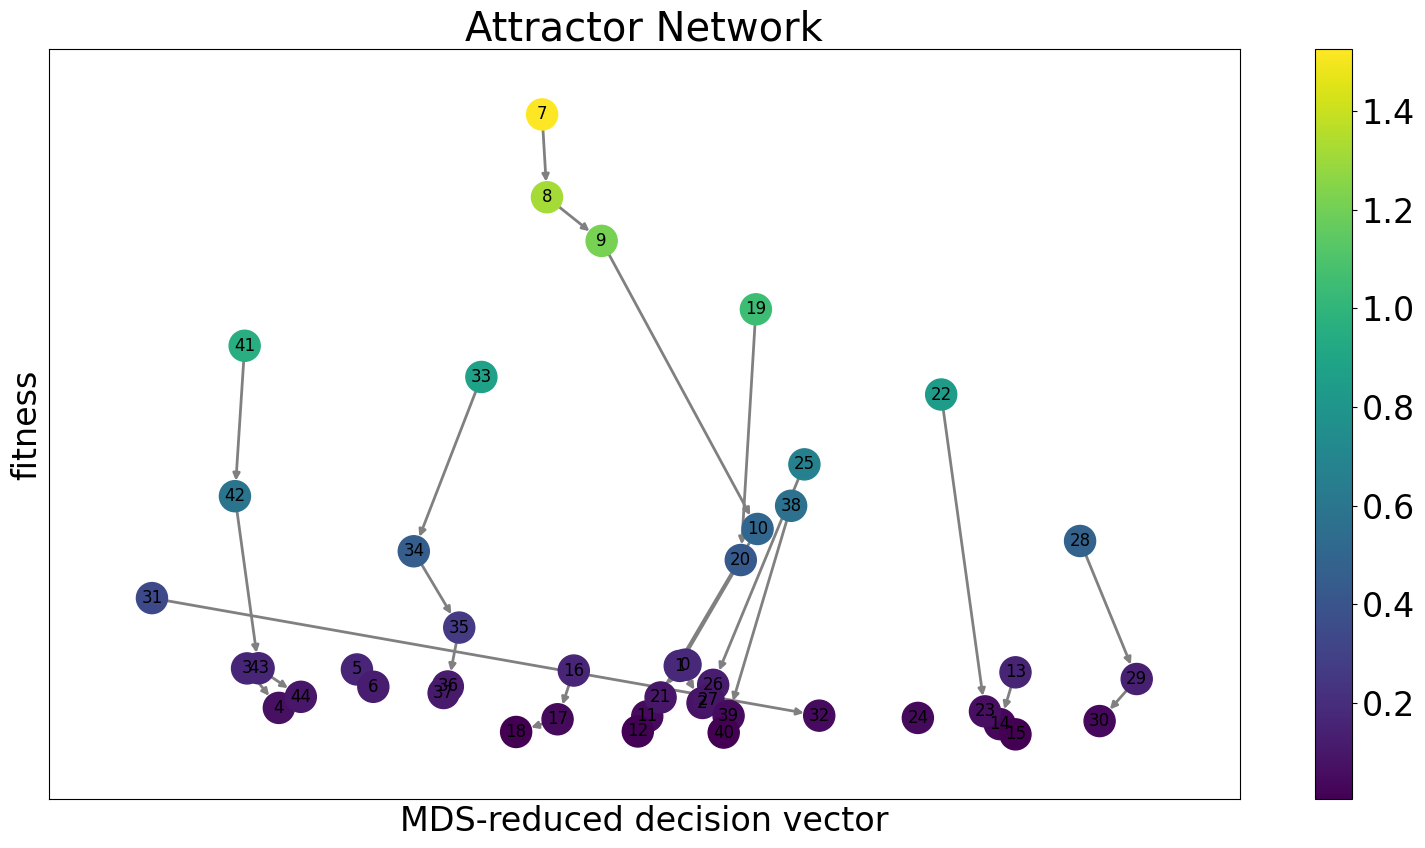

In [104]:
from iohinspector import DataManager, plot_attractor_network
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1], algorithms=['RandomSearch']).load(True, True)
ax, nodes_df, edges_df = plot_attractor_network(
    df,
    coord_vars=["x0", "x1"],
    fval_var="raw_y",
    file_name="example_plots/attractor_network.png"
)

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/iohinspector/align.py:109: UserWarning: Sortedness of columns cannot be checked when 'by' groups provided
  result_df = x_vals.join_asof(


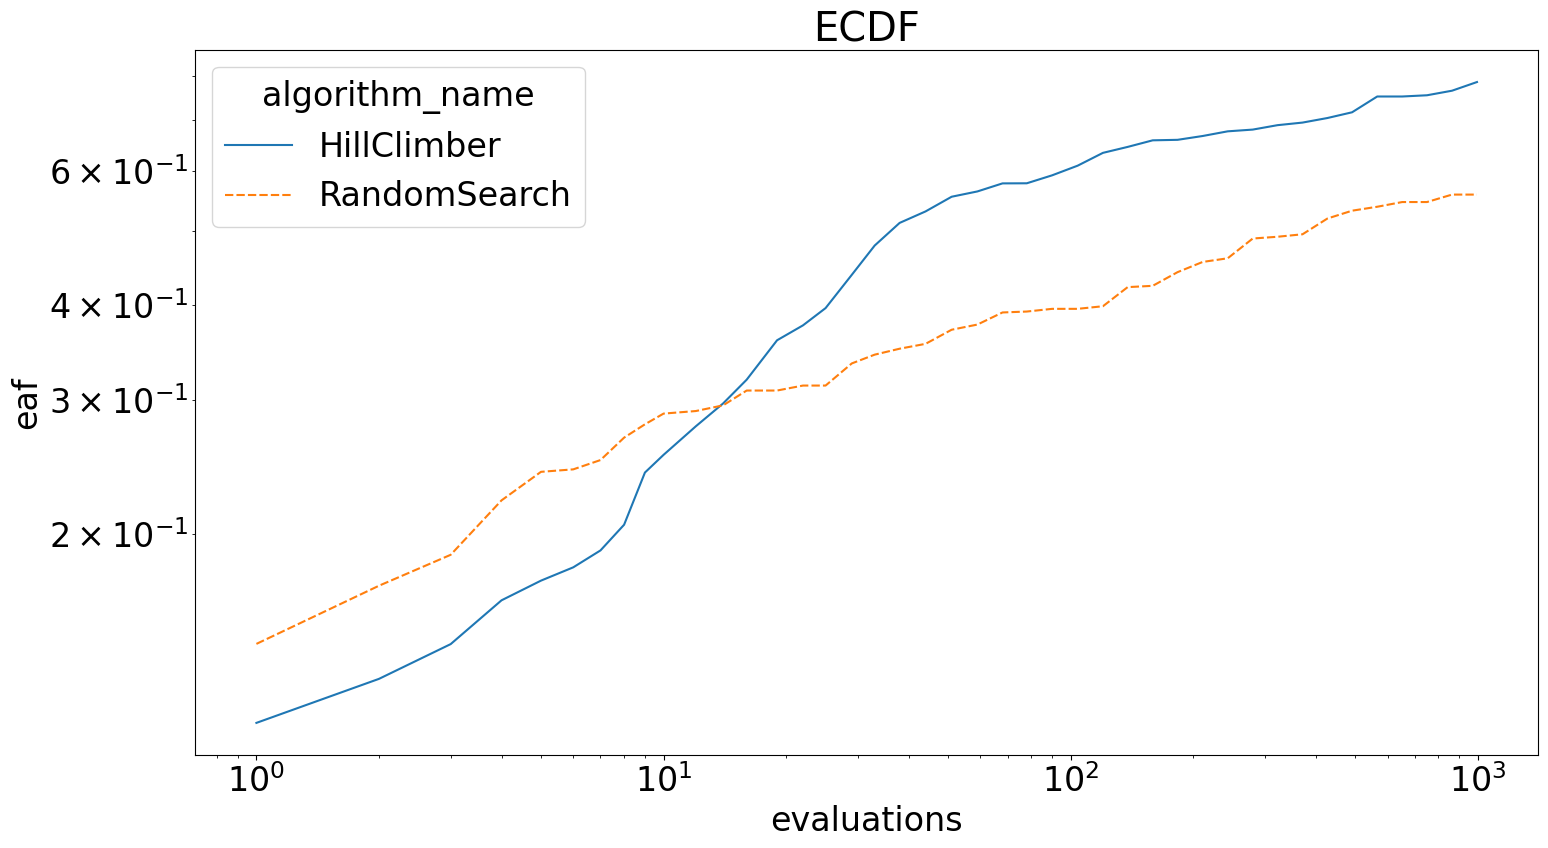

In [105]:
from iohinspector import DataManager, plot_ecdf
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1]).load(True, True)
ax, data = plot_ecdf(
    df,
    file_name="example_plots/ecdf.png"
)

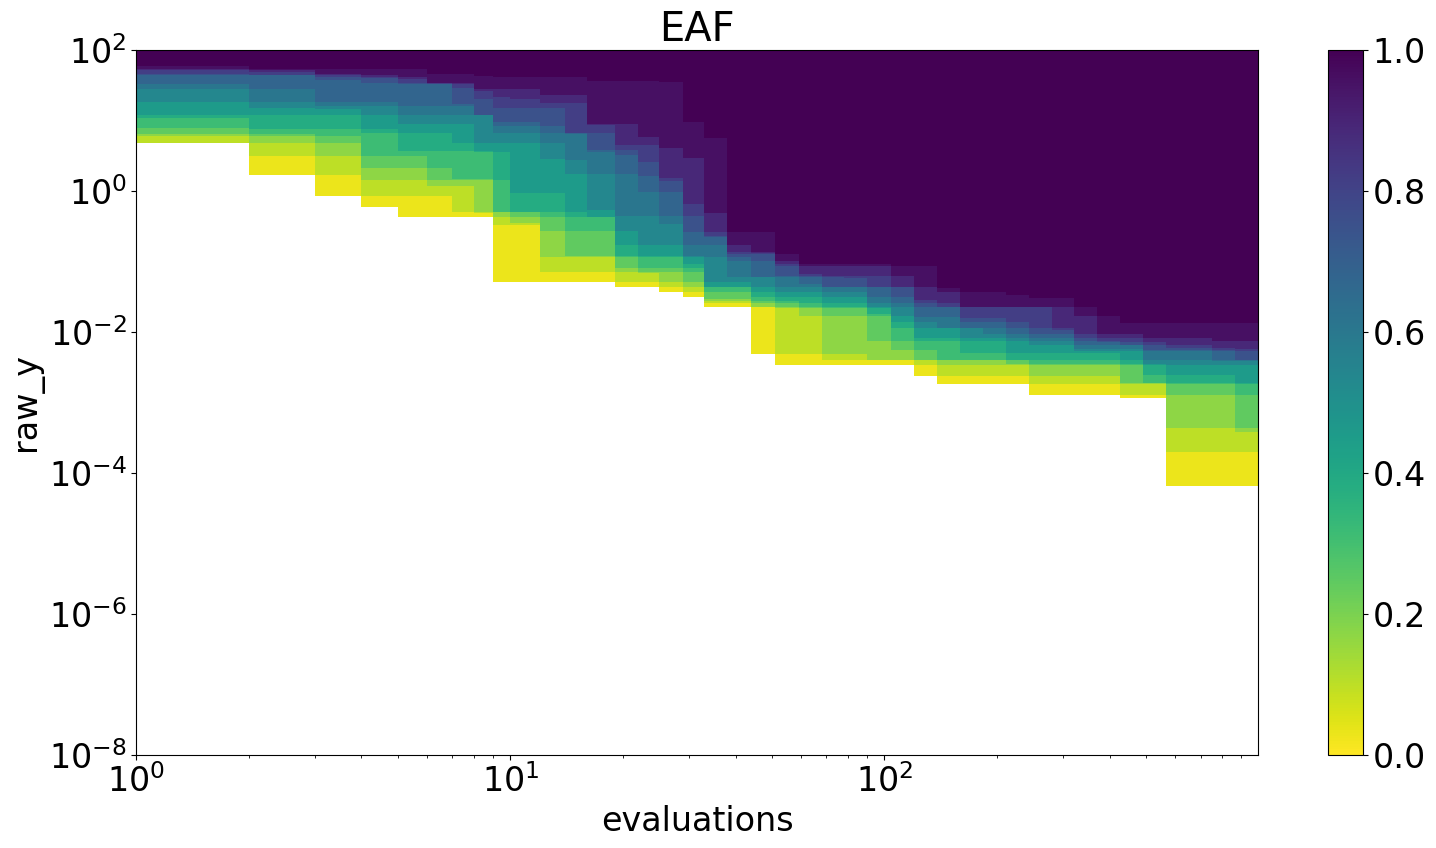

In [106]:
from iohinspector import DataManager, plot_eaf_single_objective
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1], algorithms=['HillClimber']).load(True, True)
ax, data = plot_eaf_single_objective(
    df,
    file_name="example_plots/eaf_single_objective.png"
)

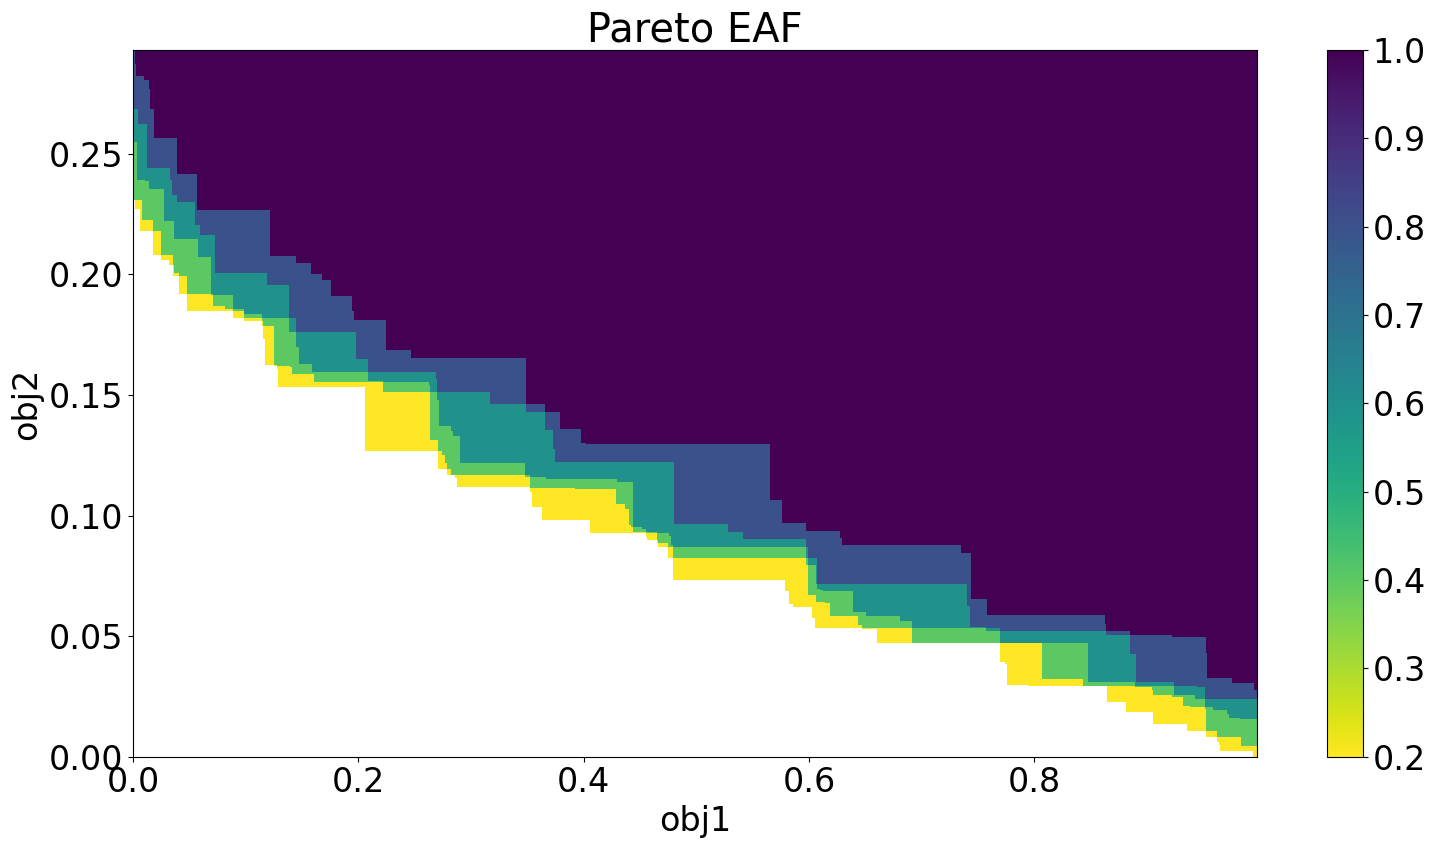

In [107]:
from iohinspector import DataManager, plot_eaf_pareto, add_normalized_objectives
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df = manager.select(function_ids=[0], algorithms=['NSGA2']).load(False, False)
df = add_normalized_objectives(df, obj_vars = ['raw_y', 'F2'])
ax, data = plot_eaf_pareto(
    df,
    obj1_var="obj1",
    obj2_var="obj2",
    file_name="example_plots/eaf_pareto.png"
)

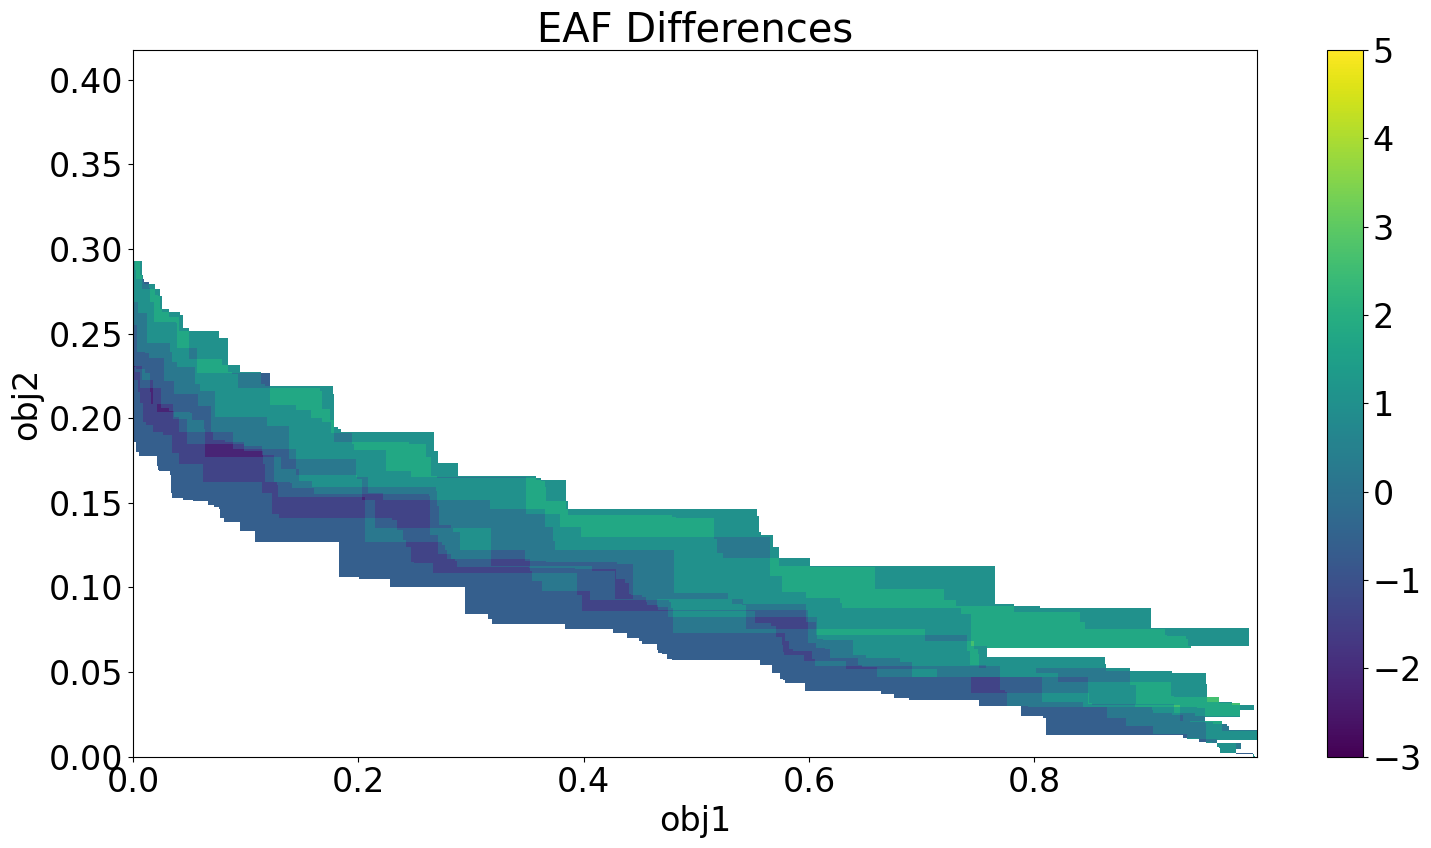

In [108]:
from iohinspector import DataManager, plot_eaf_diffs, add_normalized_objectives
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df1 = manager.select(function_ids=[0], algorithms=['NSGA2']).load(False, False)
df1 = add_normalized_objectives(df1, obj_vars = ['raw_y', 'F2'])

df2 = manager.select(function_ids=[0], algorithms=['SMS-EMOA']).load(False, False)
df2 = add_normalized_objectives(df2, obj_vars = ['raw_y', 'F2'])

ax, data = plot_eaf_diffs(
    df1,
    df2,
    obj1_var="obj1",
    obj2_var="obj2",
    file_name="example_plots/eaf_diffs.png"
)

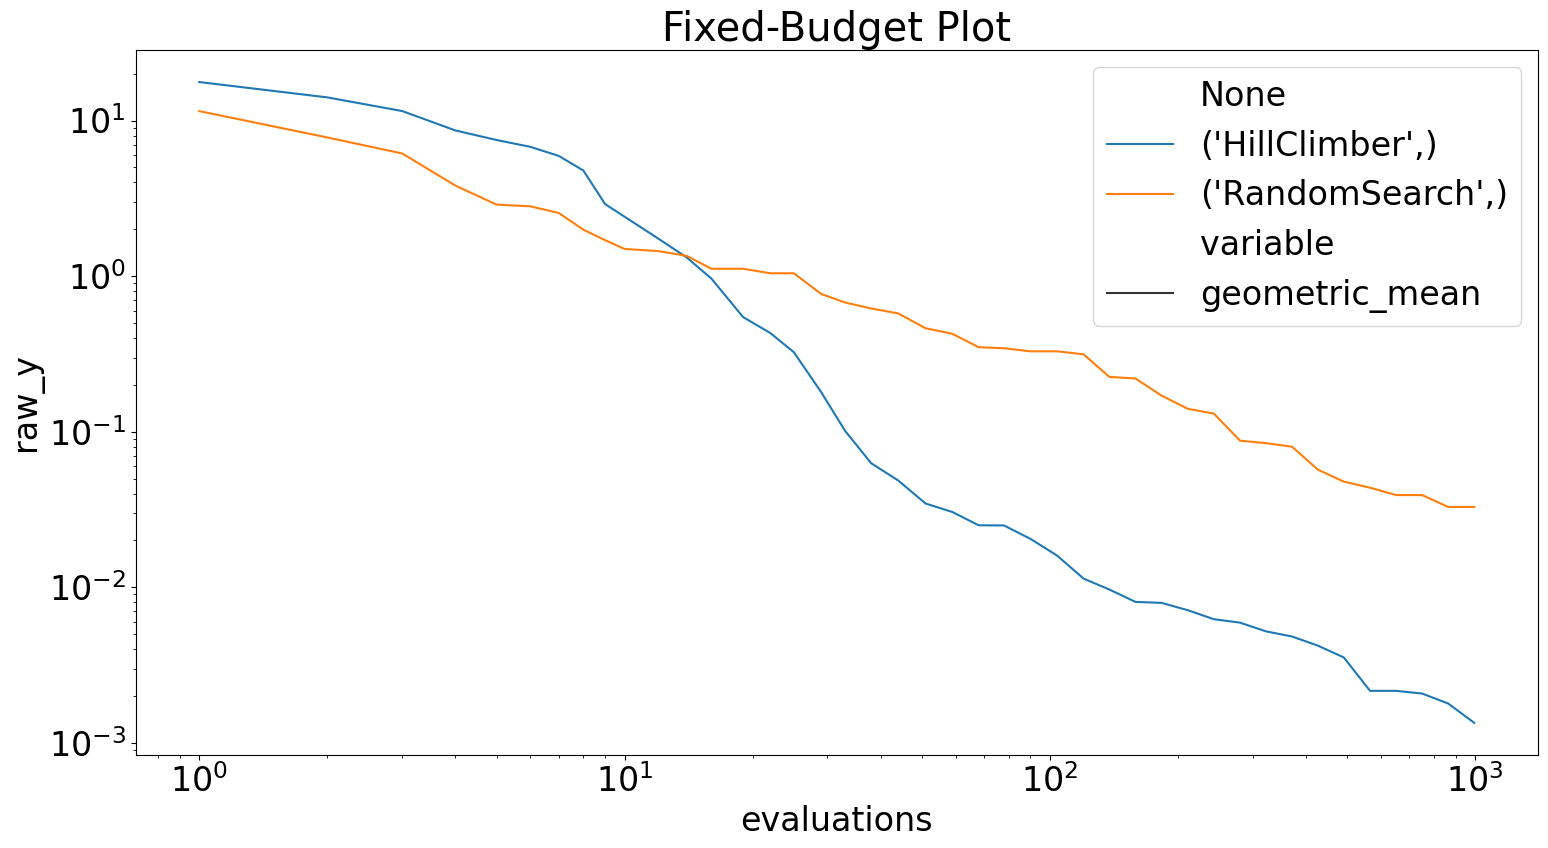

In [109]:
from iohinspector import DataManager, plot_single_function_fixed_budget
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1]).load(True, True)
ax, data = plot_single_function_fixed_budget(
    df,
    file_name="example_plots/fixed_budget.png"
)

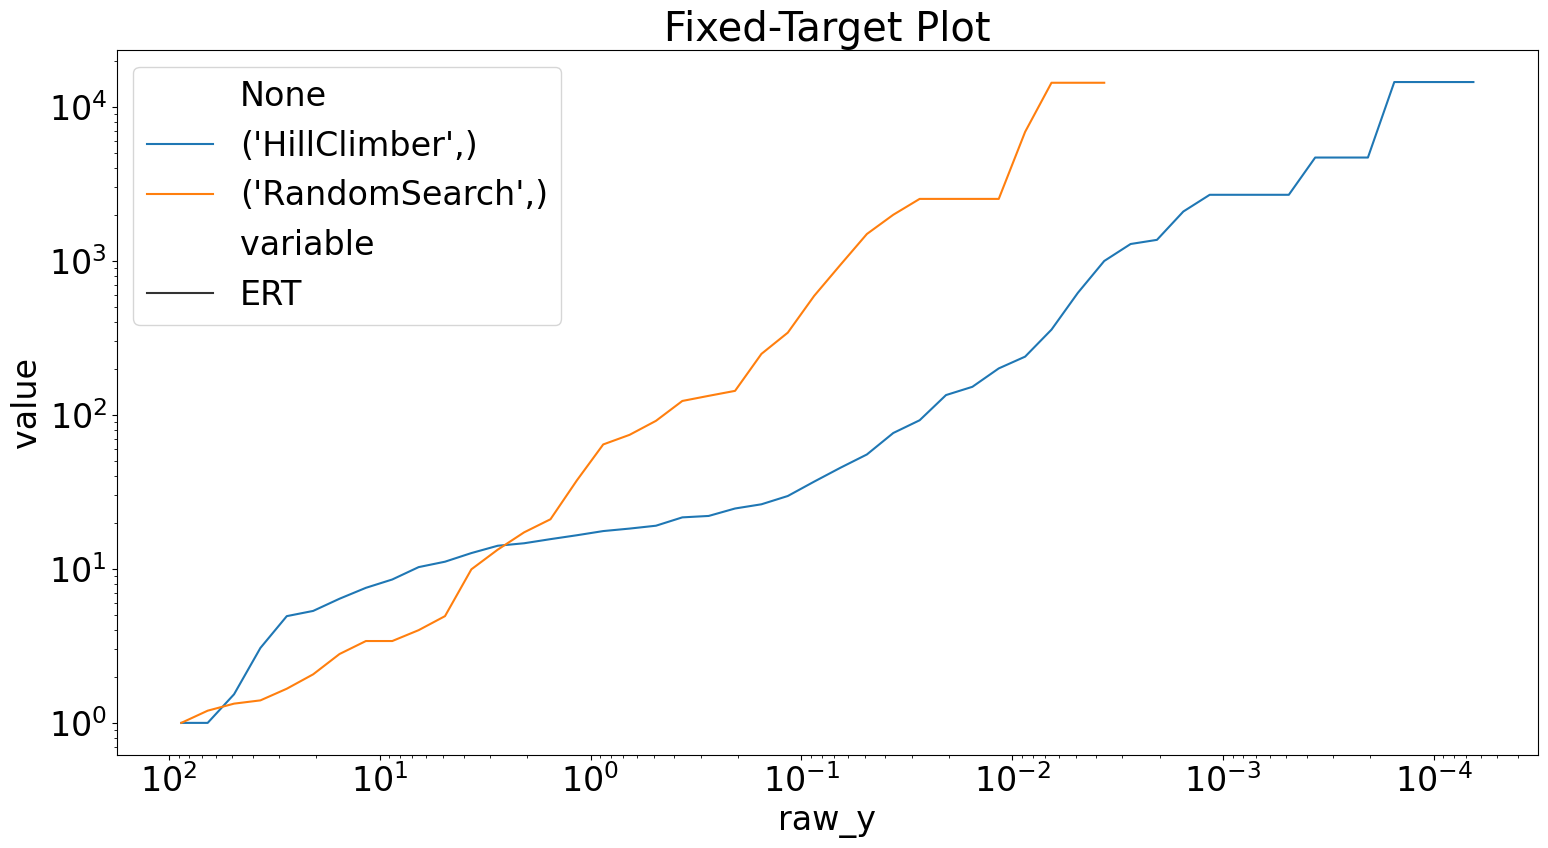

In [110]:
from iohinspector import DataManager, plot_single_function_fixed_target
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1]).load(True, True)
ax, data = plot_single_function_fixed_target(
    df,
    file_name="example_plots/fixed_target.png"
)

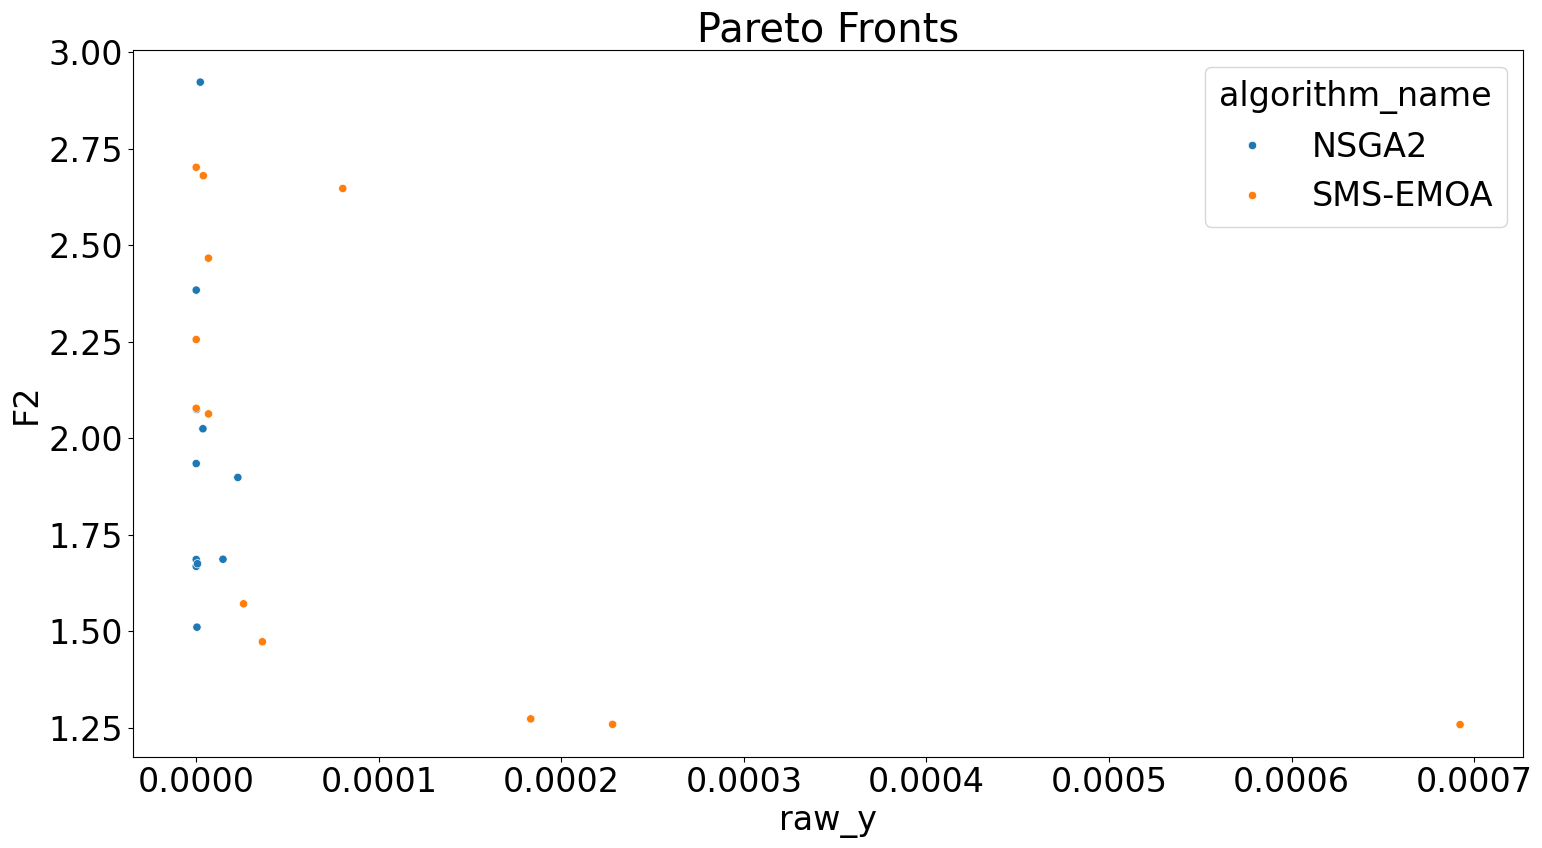

In [111]:
from iohinspector import DataManager, plot_paretofronts_2d
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df = manager.select().load(True, True)

ax, data = plot_paretofronts_2d(
    df,
    obj1_var="raw_y",
    obj2_var="F2",
    file_name="example_plots/pareto_fronts.png"
)

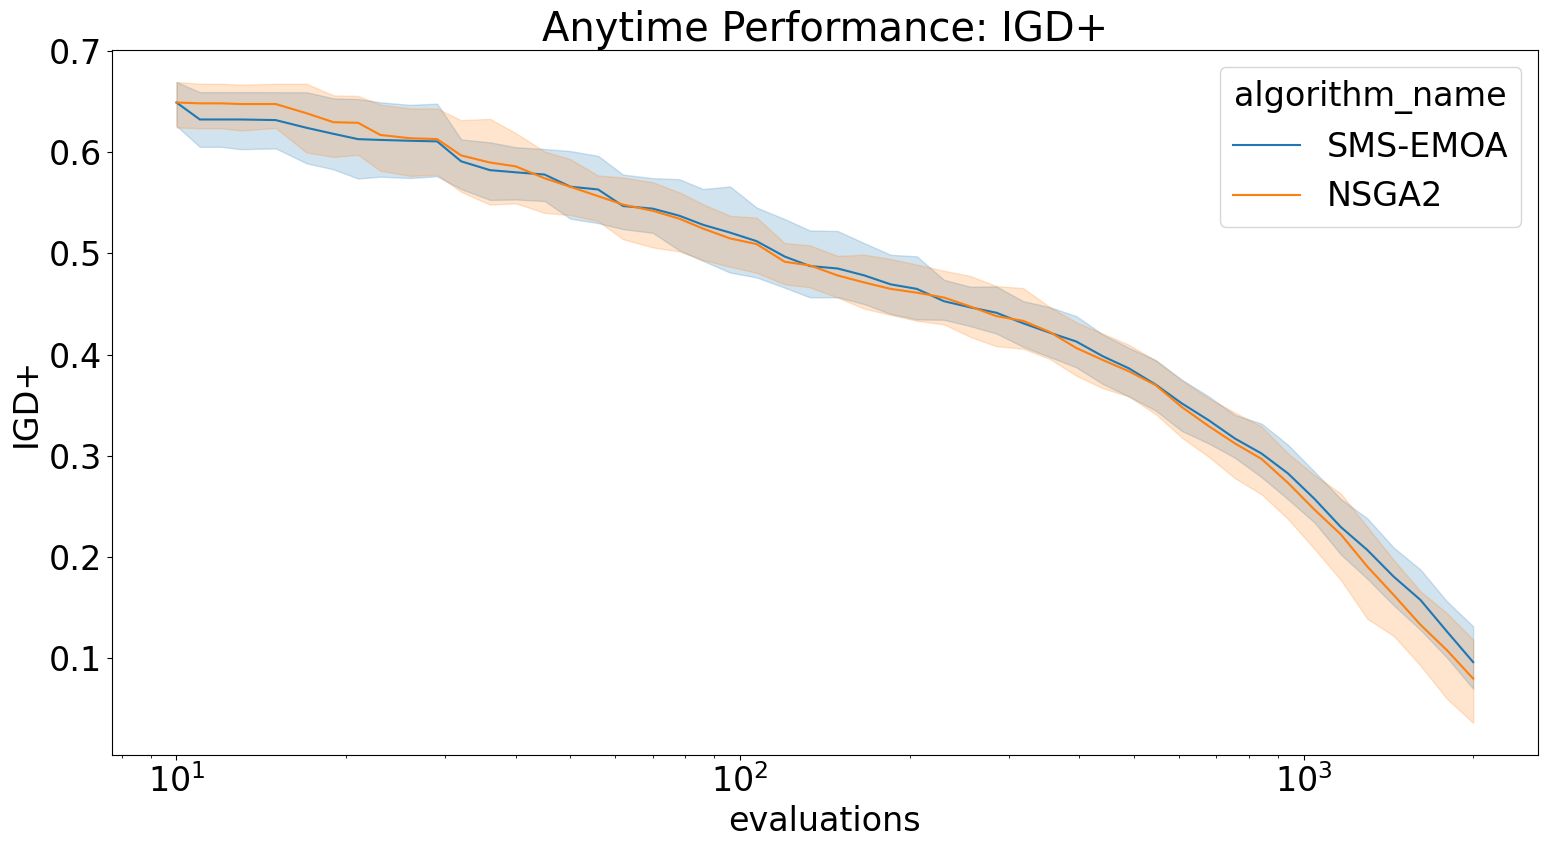

In [112]:
from iohinspector import DataManager, plot_indicator_over_time, add_normalized_objectives, get_reference_set, IGDPlus
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df = manager.select(function_ids=[1]).load(False, True)
df = add_normalized_objectives(df, obj_vars = ['raw_y', 'F2'])
ref_set = get_reference_set(df, ['obj1', 'obj2'], 1000)

igdp_indicator = IGDPlus(reference_set = ref_set)

ax, data = plot_indicator_over_time(
    df, ['obj1', 'obj2'], igdp_indicator, 
    eval_min=10, eval_max=2000, eval_steps=50, free_var='algorithm_name',
    file_name="example_plots/indicator_over_time.png"
)

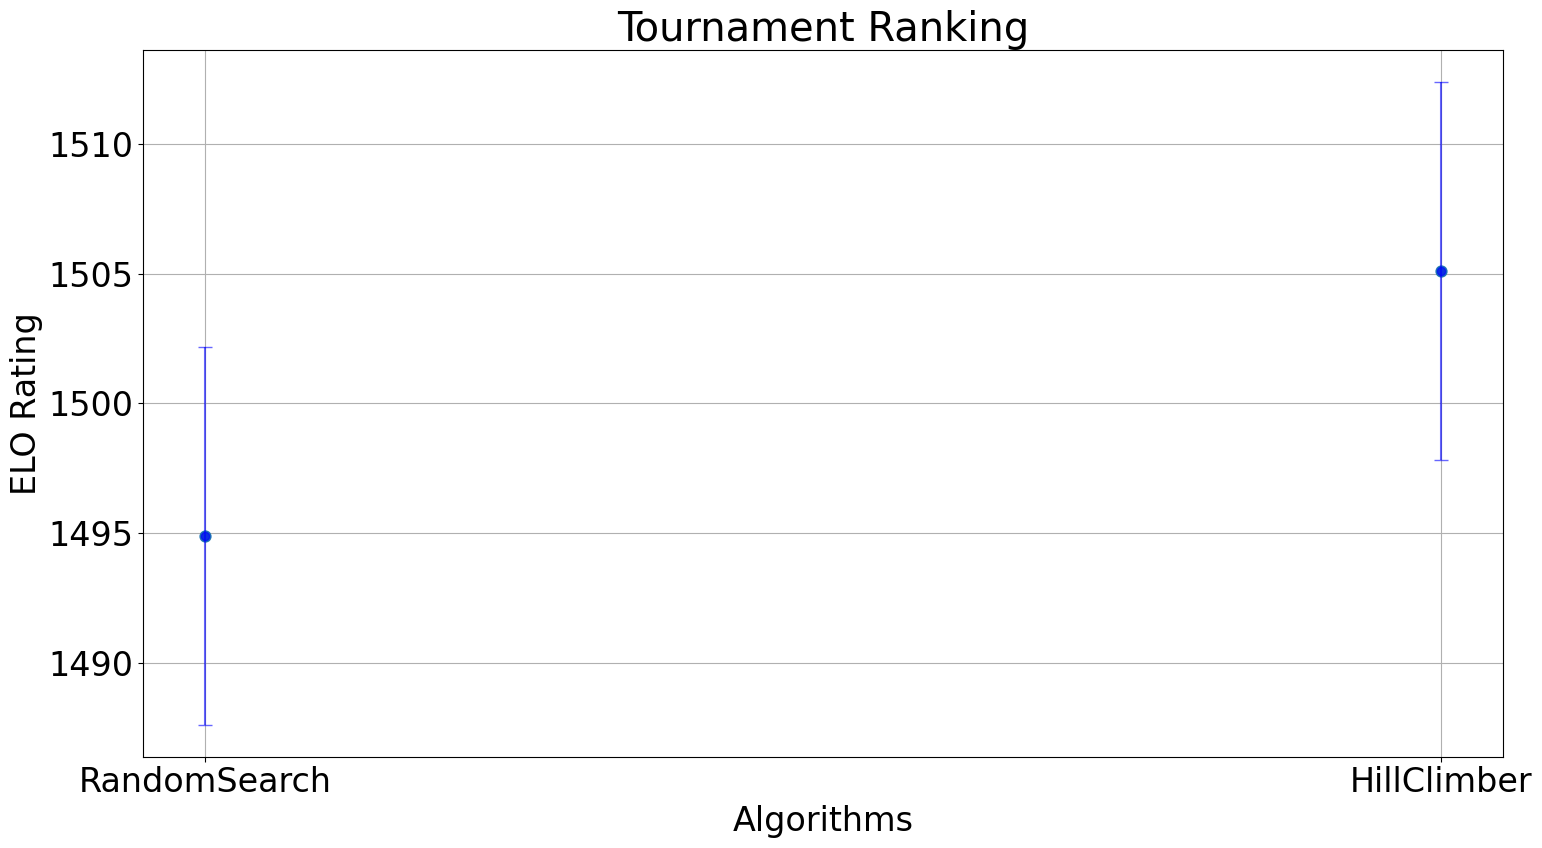

In [113]:
from iohinspector import DataManager, plot_tournament_ranking
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1]).load(True, True)
ax, data = plot_tournament_ranking(
    df,
    file_name="example_plots/tournament_rankings.png"
)

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/comparison/bootstrap_comparison.py:67: UserWarning: There are only 252 unique samples possible,  which is less than the requested 1000 bootstrap samples. Duplicate samples are inevitable. Consider increasing the number of instances or reducing the number of bootstraps.
  warnings.warn(f"There are only {binom(2*num_instances, num_instances):.0f} unique samples possible,  "


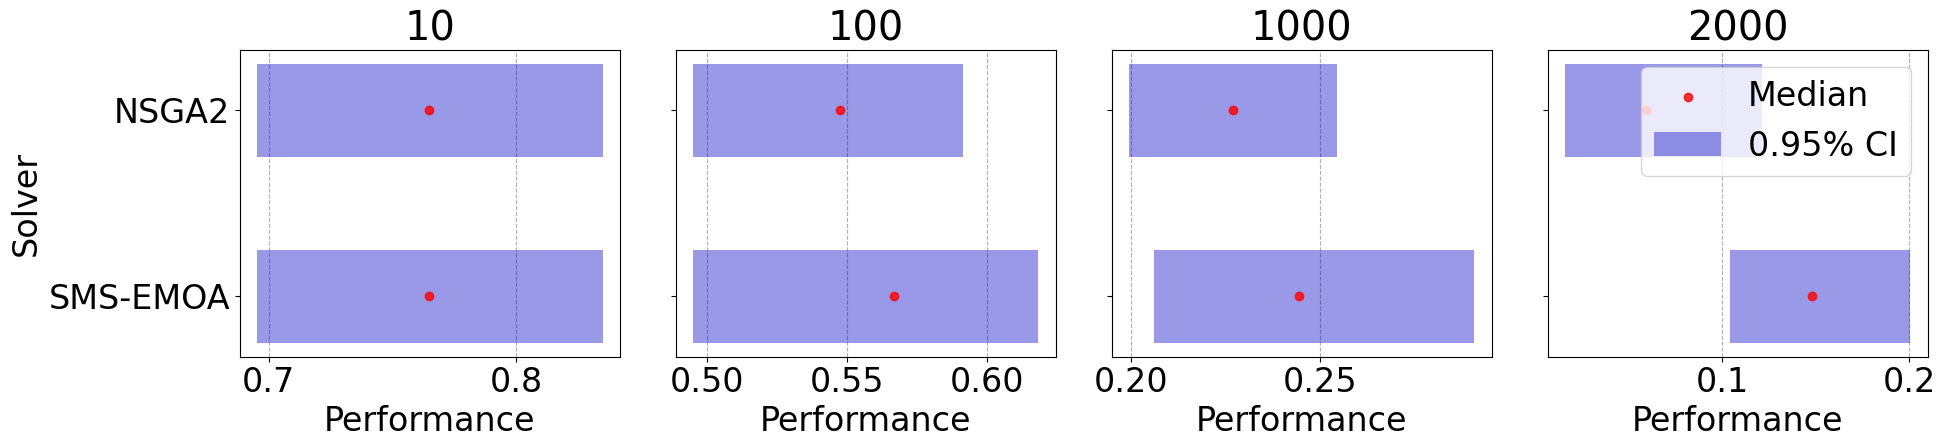

In [114]:
from iohinspector import DataManager, plot_robustrank_over_time, IGDPlus, get_reference_set, add_normalized_objectives
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df = manager.select(function_ids=[1]).load(True, True)
df = add_normalized_objectives(df, obj_vars = ['raw_y', 'F2'])
ref_set = get_reference_set(df, ['obj1', 'obj2'], 1000)

igdp_indicator = IGDPlus(reference_set = ref_set)
evals = [10,100,1000,2000]

ax, comparison, benchmark = plot_robustrank_over_time(
    df,
    obj_vars=['obj1', 'obj2'],
    evals=evals,
    indicator=igdp_indicator,
    file_name="example_plots/robustrank_over_time.png"
)

/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/comparison/bootstrap_comparison.py:67: UserWarning: There are only 252 unique samples possible,  which is less than the requested 1000 bootstrap samples. Duplicate samples are inevitable. Consider increasing the number of instances or reducing the number of bootstraps.
  warnings.warn(f"There are only {binom(2*num_instances, num_instances):.0f} unique samples possible,  "
/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/comparison/abstract_comparison.py:45: UserWarning: No results found. Start computations
  warnings.warn("No results found. Start computations")
/home/dinu/miniconda3/envs/iohinspector/lib/python3.10/site-packages/robustranking/compa

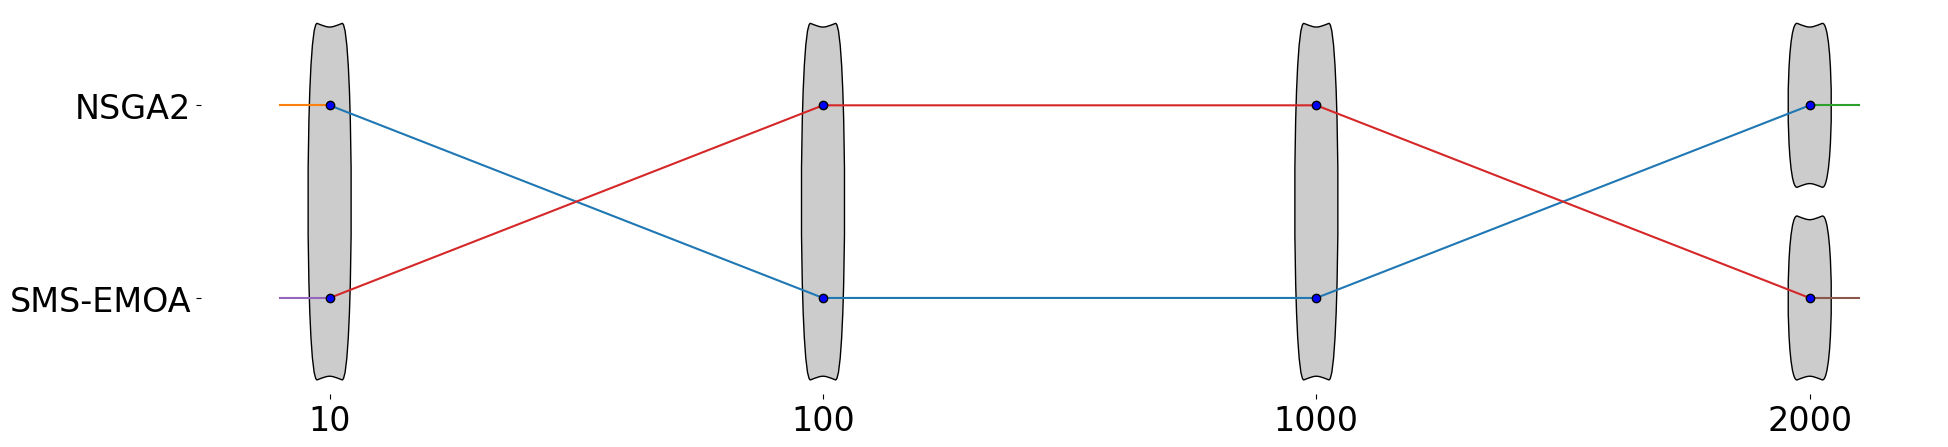

In [115]:
from iohinspector import DataManager, plot_robustrank_changes, IGDPlus, get_reference_set, add_normalized_objectives
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("MO_Data")

df = manager.select(function_ids=[1]).load(True, True)
df = add_normalized_objectives(df, obj_vars = ['raw_y', 'F2'])
ref_set = get_reference_set(df, ['obj1', 'obj2'], 1000)

igdp_indicator = IGDPlus(reference_set = ref_set)
evals = [10,100,1000,2000]

ax, comparison = plot_robustrank_changes(
    df,
    obj_vars=['obj1', 'obj2'],
    evals=evals,
    indicator=igdp_indicator,
    file_name="example_plots/robustrank_changes.png"
)

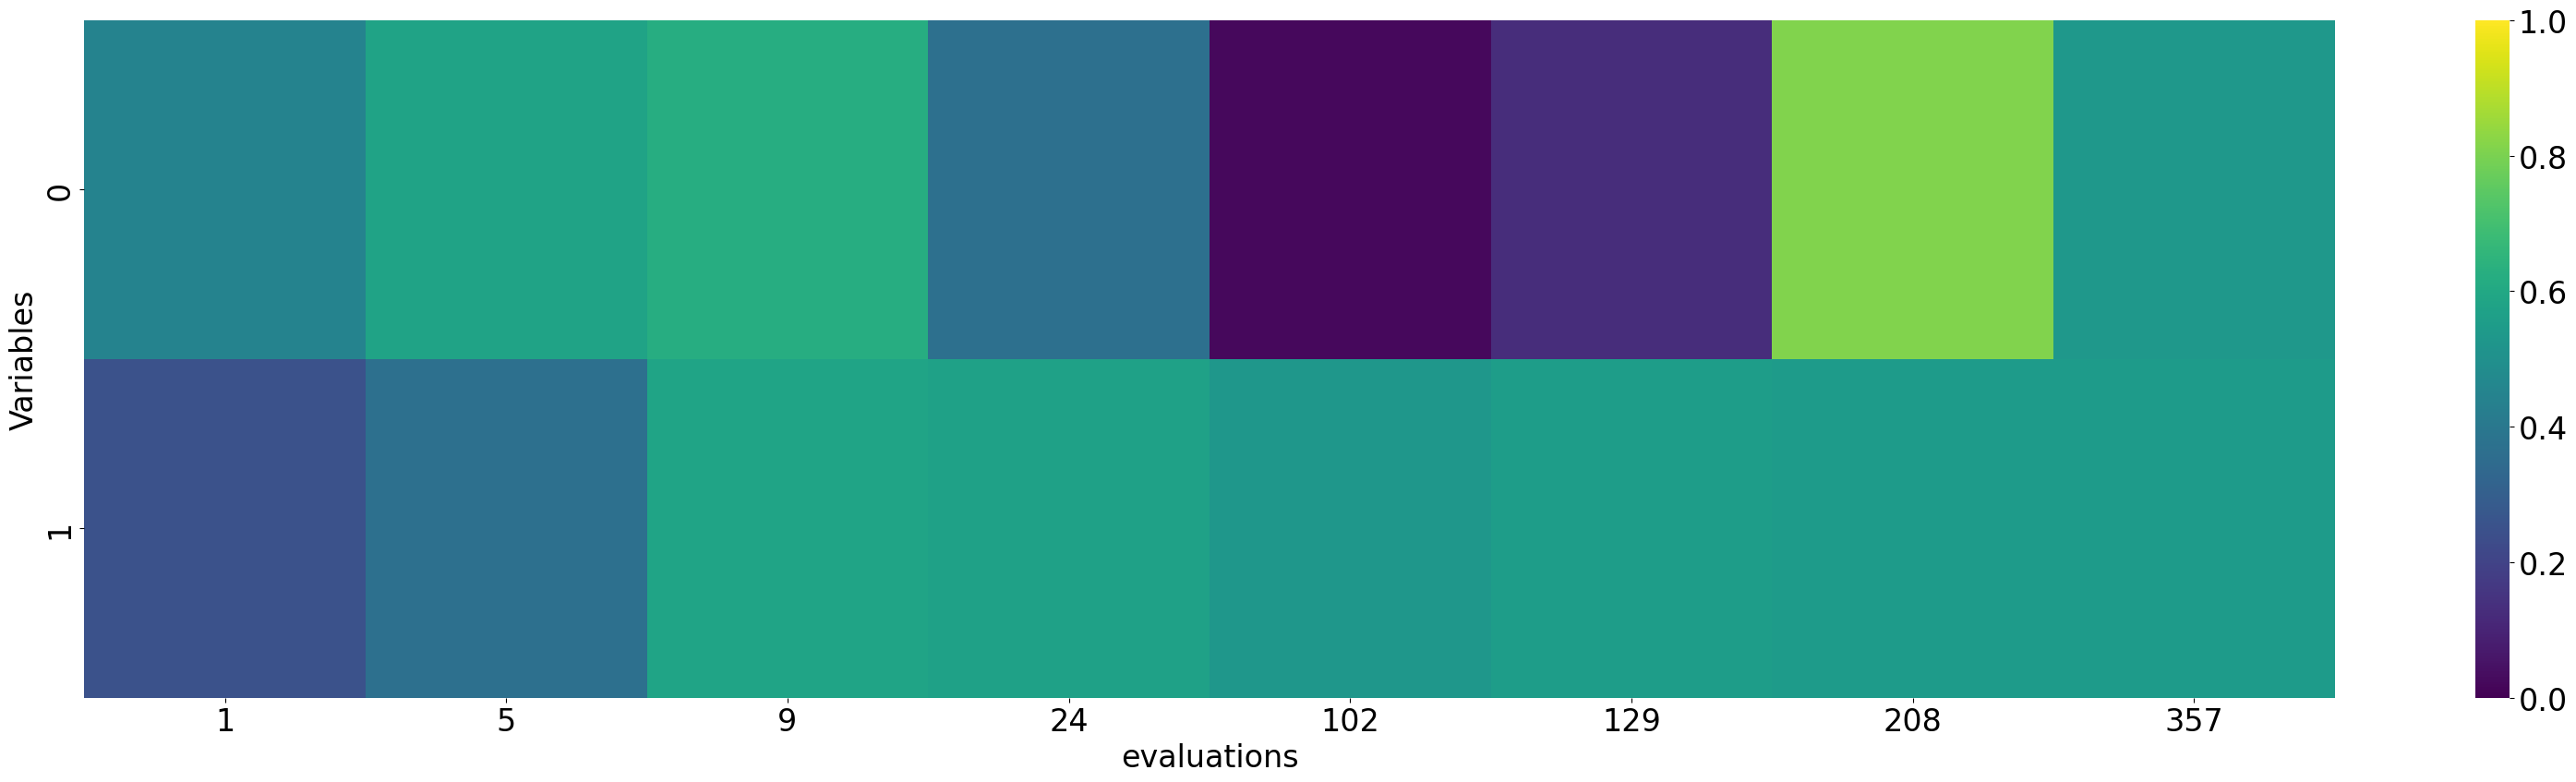

In [116]:
from iohinspector import DataManager, plot_heatmap_single_run
import os

os.makedirs("example_plots", exist_ok=True)

manager = DataManager()
manager.add_folder("SO_Data")

df = manager.select(function_ids=[1], data_ids=[1], algorithms=["RandomSearch"]).load(True, True)

ax, data = plot_heatmap_single_run(
    df,
    vars = ["x0","x1"],
    var_mins=[-5,-5],
    var_maxs=[5,5],
    file_name="example_plots/heatmap_single_run.png"
)